In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/weight-vs-height/wtvsht.csv')
df.head()

,Weight,Height
0,63,174
1,55,168
2,58,176
3,63,185
4,53,167


In [3]:
!pip install scikit-learn

In [4]:
df.corr()

,Weight,Height
Weight,1.00000,0.83274
Height,0.83274,1.00000


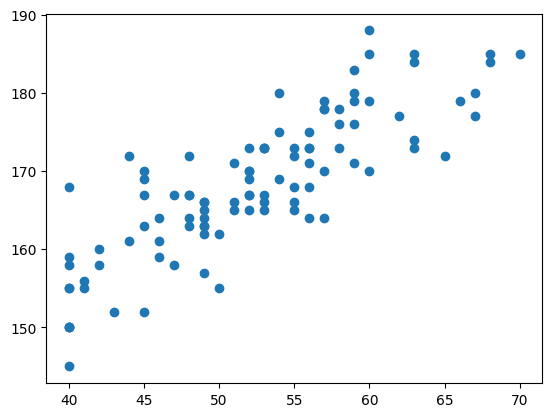

In [5]:
plt.scatter(df['Weight'], df['Height'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


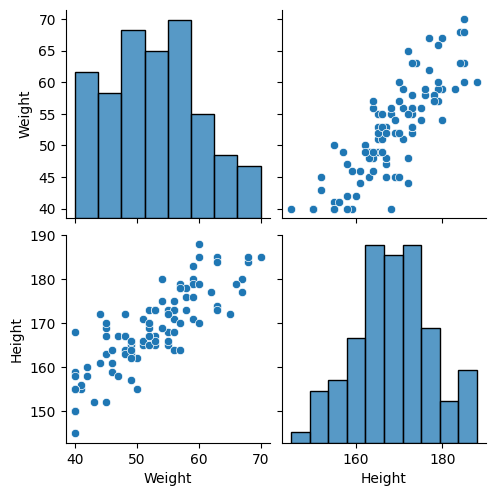

In [6]:
sns.pairplot(df)

In [7]:
X =  df[["Weight"]]
y = df["Height"]

X,y

(    Weight
 0       63
 1       55
 2       58
 3       63
 4       53
 ..     ...
 95      40
 96      55
 97      44
 98      57
 99      52
 
 [100 rows x 1 columns],
 0     174
 1     168
 2     176
 3     185
 4     167
      ... 
 95    155
 96    172
 97    172
 98    170
 99    167
 Name: Height, Length: 100, dtype: int64)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.25, random_state = 67)
X_train, X_test, y_train, y_test

(    Weight
 15      48
 2       58
 21      47
 25      56
 5       52
 ..     ...
 7       62
 69      48
 74      40
 53      59
 67      67
 
 [75 rows x 1 columns],
     Weight
 17      53
 24      56
 64      58
 93      49
 97      44
 29      45
 3       63
 70      55
 82      63
 11      49
 66      45
 59      59
 48      63
 14      45
 83      57
 0       63
 40      67
 43      49
 79      40
 4       53
 10      55
 99      52
 65      59
 30      45
 47      54,
 15    164
 2     176
 21    167
 25    171
 5     167
      ... 
 7     177
 69    163
 74    145
 53    176
 67    180
 Name: Height, Length: 75, dtype: int64,
 17    173
 24    164
 64    178
 93    166
 97    172
 29    167
 3     185
 70    173
 82    184
 11    165
 66    169
 59    179
 48    173
 14    152
 83    164
 0     174
 40    177
 43    166
 79    150
 4     167
 10    165
 99    167
 65    183
 30    163
 47    180
 Name: Height, dtype: int64)

In [10]:
#make the data into a standard normal distribution
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test

(array([[-0.51411479],
        [ 0.80638552],
        [-0.64616482],
        [ 0.54228546],
        [ 0.01408534],
        [ 0.14613537],
        [-1.57051503],
        [-0.51411479],
        [ 2.12688582],
        [-0.64616482],
        [-1.438465  ],
        [ 2.39098588],
        [ 0.41023543],
        [-1.57051503],
        [-0.77821485],
        [-0.11796469],
        [ 0.14613537],
        [-0.91026488],
        [-1.57051503],
        [ 0.01408534],
        [-1.57051503],
        [ 2.12688582],
        [ 0.41023543],
        [ 0.01408534],
        [-1.57051503],
        [ 0.54228546],
        [ 1.86278576],
        [ 0.2781854 ],
        [ 0.01408534],
        [-1.57051503],
        [-1.30641497],
        [-1.57051503],
        [ 1.73073573],
        [-0.51411479],
        [-0.38206475],
        [ 1.07048558],
        [-1.17436494],
        [ 0.67433549],
        [ 1.07048558],
        [-0.51411479],
        [ 0.41023543],
        [-0.11796469],
        [-0.11796469],
        [-0

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regression = LinearRegression(n_jobs = -1)

In [14]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [15]:
regression.coef_, regression.intercept_

(array([7.82567215]), 167.84)

In [16]:
y_pred = regression.predict(X_test)
y_pred, y_test

(array([168.98360747, 172.08374821, 174.1505087 , 164.85008649,
        159.68318526, 160.71656551, 179.31740993, 171.05036796,
        179.31740993, 164.85008649, 160.71656551, 175.18388895,
        179.31740993, 160.71656551, 173.11712846, 179.31740993,
        183.45093091, 164.85008649, 155.54966428, 168.98360747,
        171.05036796, 167.95022723, 175.18388895, 160.71656551,
        170.01698772]),
 17    173
 24    164
 64    178
 93    166
 97    172
 29    167
 3     185
 70    173
 82    184
 11    165
 66    169
 59    179
 48    173
 14    152
 83    164
 0     174
 40    177
 43    166
 79    150
 4     167
 10    165
 99    167
 65    183
 30    163
 47    180
 Name: Height, dtype: int64)

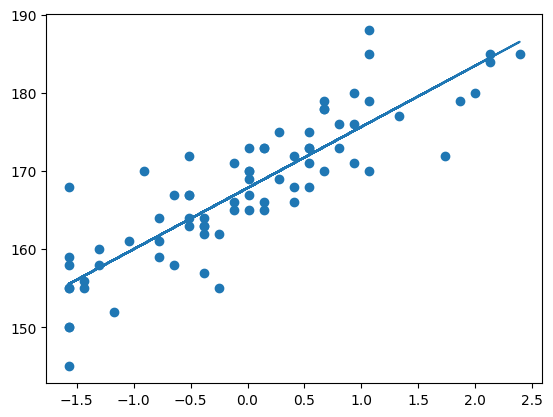

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mse, mae

(37.53824763154711, 5.27799396130024)

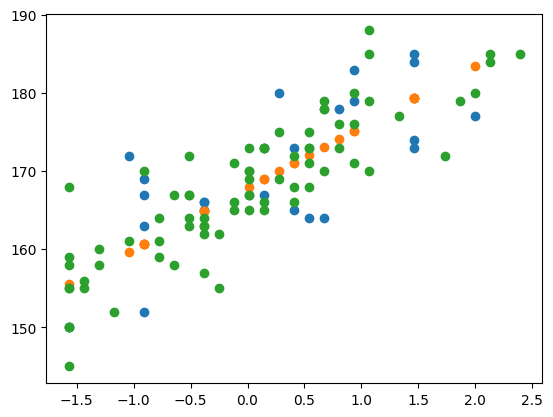

In [19]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.scatter(X_train, y_train)